In [1]:
%matplotlib inline


# Plotting and manipulating FFTs for filtering


Plot the power of the FFT of a signal and inverse FFT back to reconstruct
a signal.

This example demonstrate :func:`scipy.fftpack.fft`,
:func:`scipy.fftpack.fftfreq` and :func:`scipy.fftpack.ifft`. It
implements a basic filter that is very suboptimal, and should not be
used.




In [2]:
import numpy as np
from scipy import fftpack
from matplotlib import pyplot as plt

Generate the signal
###########################################################



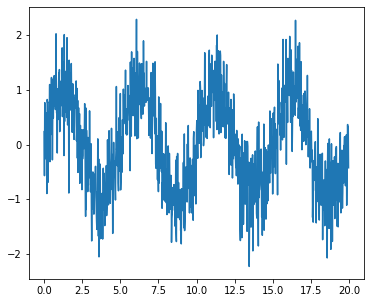

In [3]:
# Seed the random number generator
np.random.seed(1234)

time_step = 0.02
period = 5.

time_vec = np.arange(0, 20, time_step)
sig = (np.sin(2 * np.pi / period * time_vec)
       + 0.5 * np.random.randn(time_vec.size))

plt.figure(figsize=(6, 5))
plt.plot(time_vec, sig, label='Original signal')

Compute and plot the power
###########################################################



[]

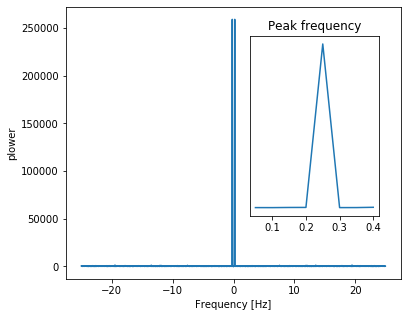

In [4]:
# The FFT of the signal
sig_fft = fftpack.fft(sig)

# And the power (sig_fft is of complex dtype)
power = np.abs(sig_fft)**2

# The corresponding frequencies
sample_freq = fftpack.fftfreq(sig.size, d=time_step)

# Plot the FFT power
plt.figure(figsize=(6, 5))
plt.plot(sample_freq, power)
plt.xlabel('Frequency [Hz]')
plt.ylabel('plower')

# Find the peak frequency: we can focus on only the positive frequencies
pos_mask = np.where(sample_freq > 0)
freqs = sample_freq[pos_mask]
peak_freq = freqs[power[pos_mask].argmax()]

# Check that it does indeed correspond to the frequency that we generate
# the signal with
np.allclose(peak_freq, 1./period)

# An inner plot to show the peak frequency
axes = plt.axes([0.55, 0.3, 0.3, 0.5])
plt.title('Peak frequency')
plt.plot(freqs[:8], power[:8])
plt.setp(axes, yticks=[])

# scipy.signal.find_peaks_cwt can also be used for more advanced
# peak detection

Remove all the high frequencies
###########################################################

 We now remove all the high frequencies and transform back from
 frequencies to signal.



C:\Users\chris.pham\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


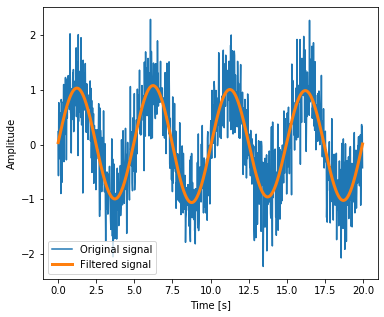

In [5]:
high_freq_fft = sig_fft.copy()
high_freq_fft[np.abs(sample_freq) > peak_freq] = 0
filtered_sig = fftpack.ifft(high_freq_fft)

plt.figure(figsize=(6, 5))
plt.plot(time_vec, sig, label='Original signal')
plt.plot(time_vec, filtered_sig, linewidth=3, label='Filtered signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')

plt.legend(loc='best')

**Note** This is actually a bad way of creating a filter: such brutal
cut-off in frequency space does not control distorsion on the signal.

Filters should be created using the scipy filter design code



In [7]:
plt.show()

In [8]:
# Above was the demonstration using FFT and IFFT to filter out noise
# It is actually a better method to use scipy filter
# Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html
from scipy import signal

In [20]:
t = time_vec
# Create an order 3 lowpass butterworth filter:
b, a = signal.butter(3, 0.05)

In [21]:
# Apply the filter to sig. Use lfilter_zi to choose the initial condition of the filter:
zi = signal.lfilter_zi(b, a)
z, _ = signal.lfilter(b, a, sig, zi=zi*sig[0])

In [22]:
# Apply the filter again, to have a result filtered at an order the same as filtfilt:
z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])

In [23]:
# Use filtfilt to apply the filter:
y = signal.filtfilt(b, a, sig)

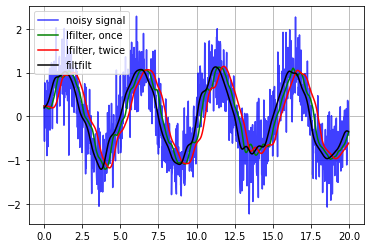

In [25]:
# Plot the original signal and the various filtered versions:
plt.figure
plt.plot(t, sig, 'b', alpha=0.75)
plt.plot(t, z, 'g', t, z2, 'r', t, y, 'k')
plt.legend(('noisy signal', 'lfilter, once', 'lfilter, twice','filtfilt'), loc='best')
plt.grid(True)
plt.show()